## DeepYeast

DeepYeast is a yeast cell image segmentation algorithm based on deep learning technology, which can automatically segment yeast cell images and quickly and accurately identify their morphological features and quantity. With the Deeplab model as its core algorithm, DeepYeast has high segmentation accuracy and robustness. In the field of biological research, yeast cells are a very important model organism, which can be used to study multiple aspects such as cell cycle, gene regulation, metabolic pathways, and more. By using the DeepYeast algorithm, biologists can analyze yeast cell image data more quickly and accurately, further accelerating the progress of scientific research.

The utilization of deepYeast presents a high degree of convenience in the field of image analysis. The tool can be accessed through two distinct methods: the ImageJ plugin or by invoking the Python API. In this context, we present a demonstration of the code implementation of deepYeast within the Jupyter Lab environment, aimed at analyzing images with a high level of accuracy and efficiency.

#### 00 Load the necessary libraries.

In [24]:
import sys
import os
sys.path.append("../")

import tensorflow as tf
from skimage.io import imread, imsave
import matplotlib.pyplot as plt
from deeplab.postprocess.post_process_utils import post_process_panoptic

#### 01 Load the pre-trained model

In [19]:
model = tf.saved_model.load("../../DYM_v1.0.0/")

#### 02 Load your test image

In [31]:
file_path = "../../deepyeast_model/image/3306_REF_DIC_01_00.png"
img = imread(file_path)

#### 03 Inference

In [32]:
output = model(tf.cast(img.reshape(img.shape[0], img.shape[1], 1), dtype=tf.float16))

#### 04 Post process

In [33]:
pmask = post_process_panoptic(output["panoptic_pred"][0].numpy(), area_threshold=1000)

#### 05 Show result

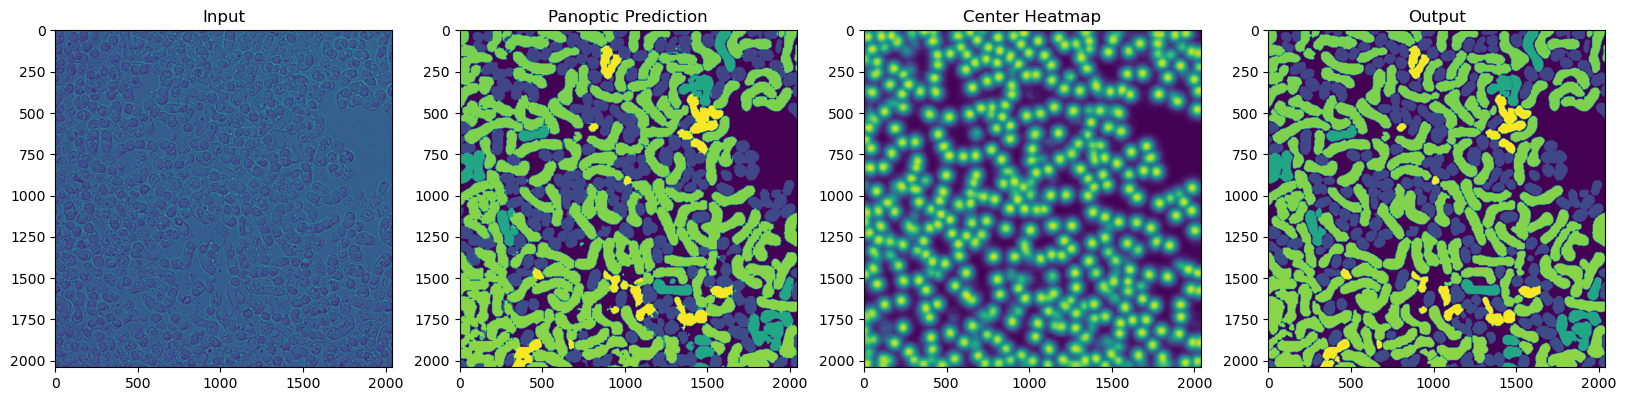

In [34]:
figs, axs = plt.subplots(1,4, figsize=(20,5))
axs[0].imshow(img)
axs[0].title.set_text('Input')
axs[1].imshow(output['panoptic_pred'][0])
axs[1].title.set_text('Panoptic Prediction')
axs[2].imshow(output['center_heatmap'][0])
axs[2].title.set_text('Center Heatmap')
axs[3].imshow(pmask)
axs[3].title.set_text('Output')

#### 06 save results

In [ ]:
imsave("<put your out put folder here>", pmask)
# signatures = cellmodel.__call__.get_concrete_function(cellmodel.get_input_spec())
# tf.saved_model.save(cellmodel, "../../model_dir/save2/", signatures=signatures)